In [1]:
#Importing differnt datasets
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
#reading csv file
data = pd.read_csv(r"C:\Users\SR\OneDrive\Desktop\Trainity\insurance.csv")

In [3]:
#lookings at the 1st 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#understanding shape and dimensions of the data
data.shape

(1338, 7)

In [5]:
#looking at the data type and values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#understanding the statistics of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe(include ='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
#finding the duplicate values
data.duplicated().sum()

1

In [9]:
#dropping the duplicate values
data.drop_duplicates(keep='first',inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
#checking the null values in each columns
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#understanding the unique values in each columns to divide it in catagorical and numerical-discrete/continuous 
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
numerical = [f for f in data.columns if data[f].dtype != 'O']


In [14]:
#moving the children from numerical to catagorical
numerical.pop(2)

'children'

In [47]:
numerical

['age', 'bmi', 'charges']

In [15]:
catagorical = [f for f in data.columns if data[f].dtype == 'O']
catagorical

['sex', 'smoker', 'region']

In [16]:
catagorical.append('children')

In [60]:
catagorical

['sex', 'smoker', 'region', 'children']

In [61]:
#We will be focing more on understanding data thru Vizualization

<Figure size 864x360 with 0 Axes>

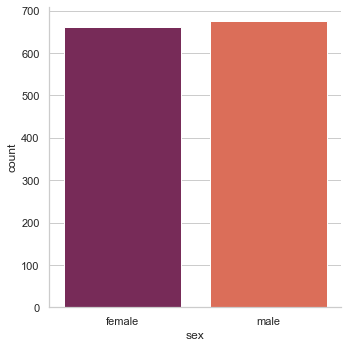

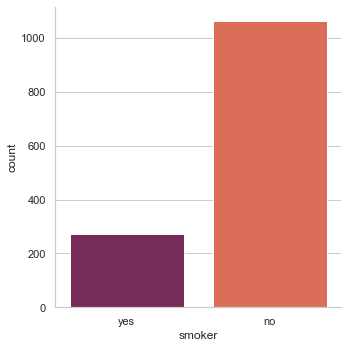

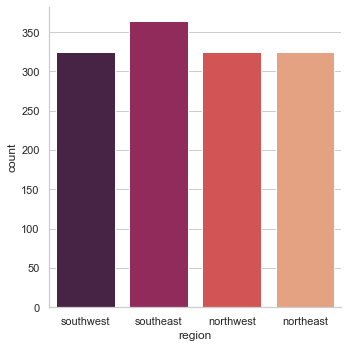

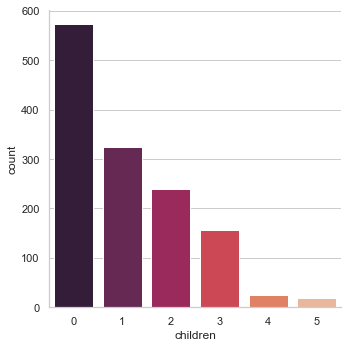

In [63]:
#Distribution of Catagorial data
sns.set_theme(style="whitegrid")
pl.figure(figsize=(12,5))
for f in catagorical:
    sns.catplot(data=data,x=f,kind='count',palette='rocket')
    pl.show()

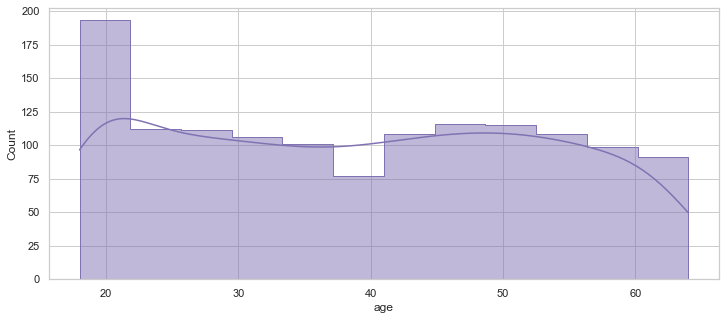

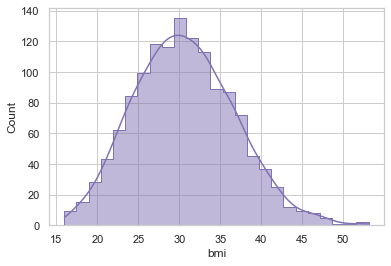

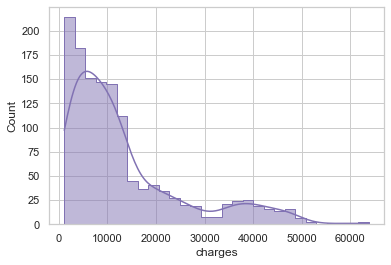

In [62]:
#Distribution of Numerical data
pl.figure(figsize=(12,5))
for f in numerical:
    sns.histplot(data=data,x=f,color='m',element='step',kde=True)
    pl.show()
    

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

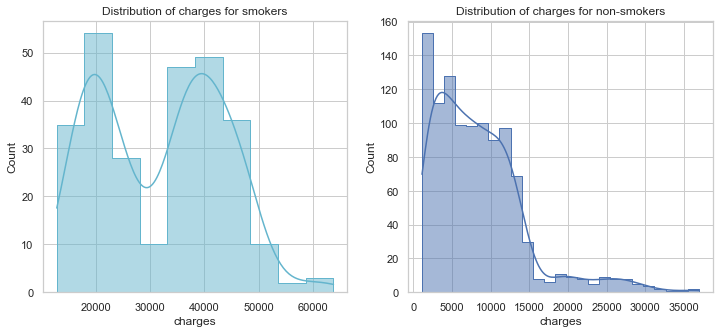

In [19]:
#Bi-variate analysis of Smokers & Non-smokers v/s charges
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax,kde=True,element='step')
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax,kde=True,element='step')
ax.set_title('Distribution of charges for non-smokers')

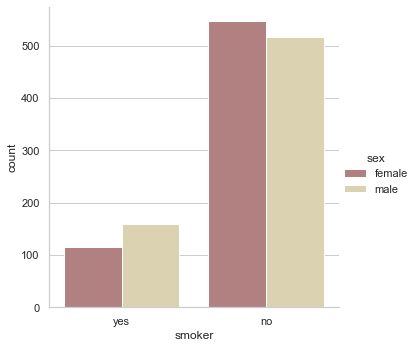

In [20]:
#Gender distribution of smokers and non-smokers
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

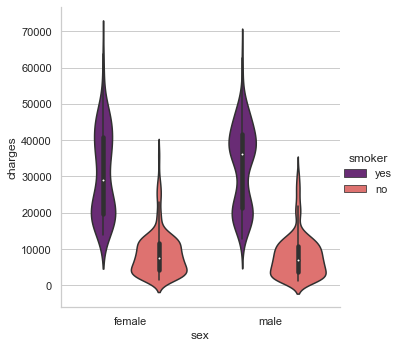

In [21]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

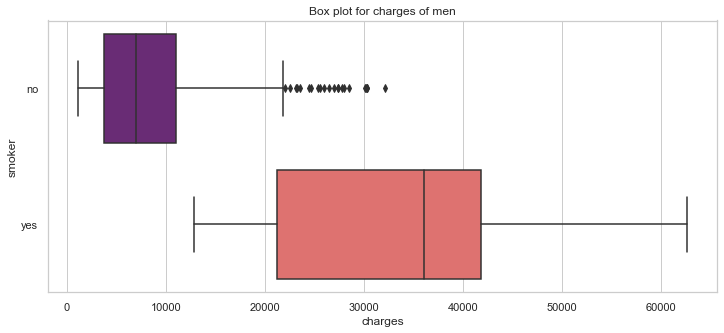

In [22]:
#Outliers in charges of smokers vs non-smoker in men
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'male')] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

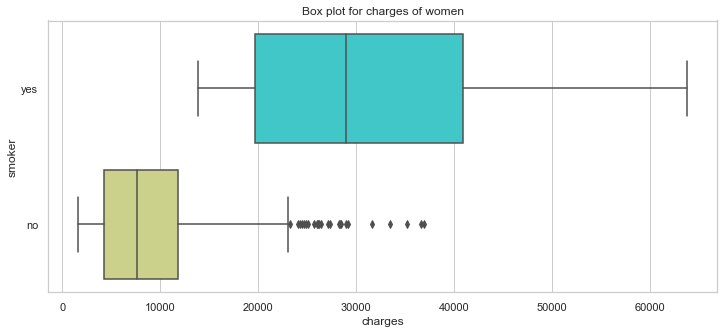

In [23]:
#Outliers in charges of smokers vs non-smoker in women
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'female')] , orient="h", palette = 'rainbow')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

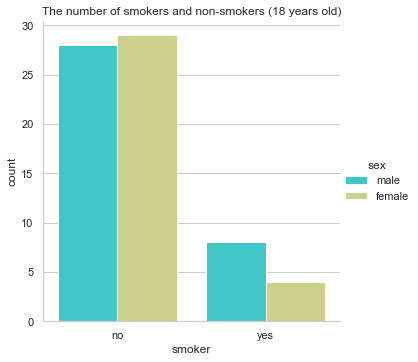

In [25]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

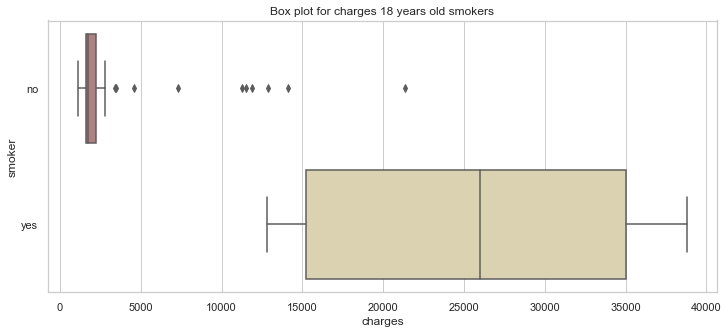

In [26]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

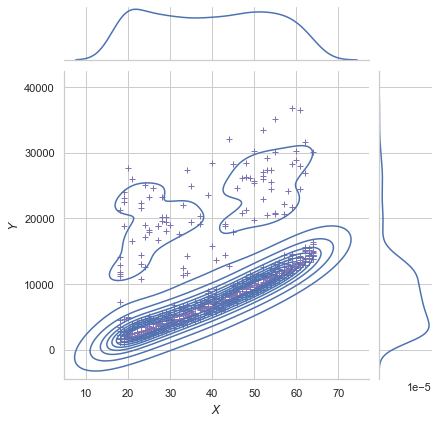

In [27]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'no')],kind="kde", color="b")
g.plot_joint(pl.scatter,c='m', s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

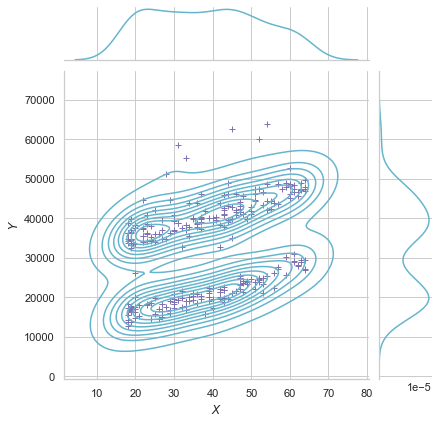

In [28]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'yes')],kind="kde", color="c")
g.plot_joint(pl.scatter, c="m", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [29]:
from bokeh.plotting import figure
from bokeh.io import curdoc, show
from bokeh.models import Circle
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 'no')].age,y=data[(data.smoker == 'no')].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [30]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 'yes')].age,y=data[(data.smoker == 'yes')].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

C:\Users\SR\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

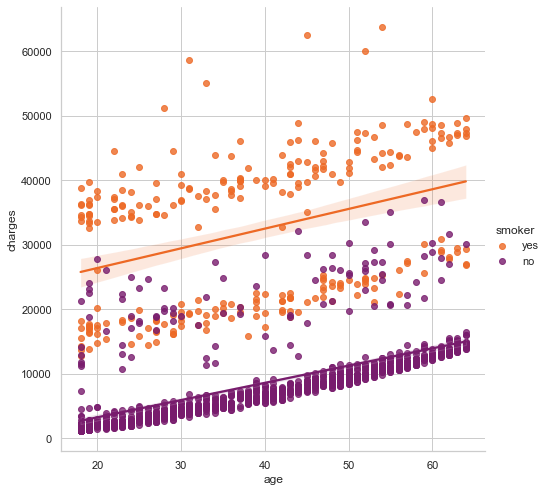

In [31]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

C:\Users\SR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


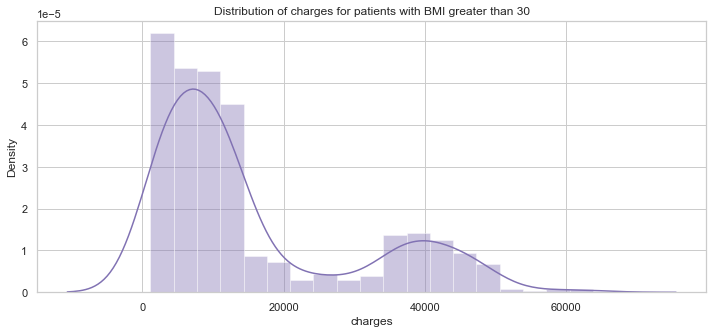

In [33]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

C:\Users\SR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


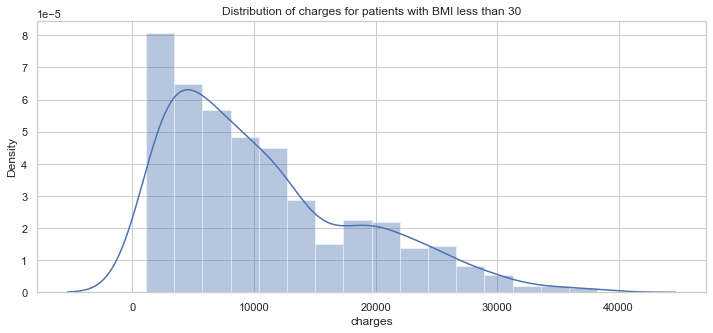

In [34]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

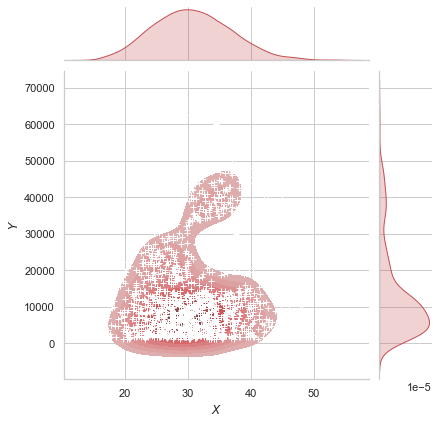

In [35]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r",fill=True)
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

C:\Users\SR\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


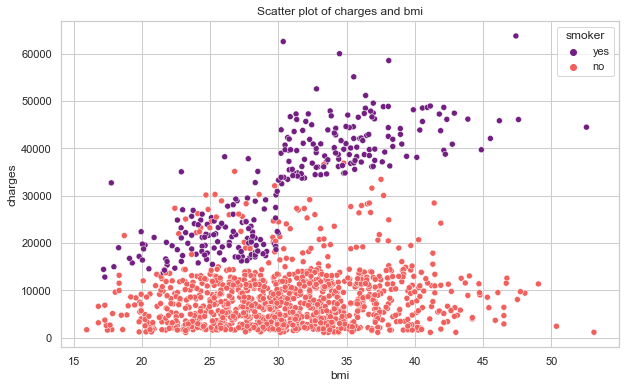

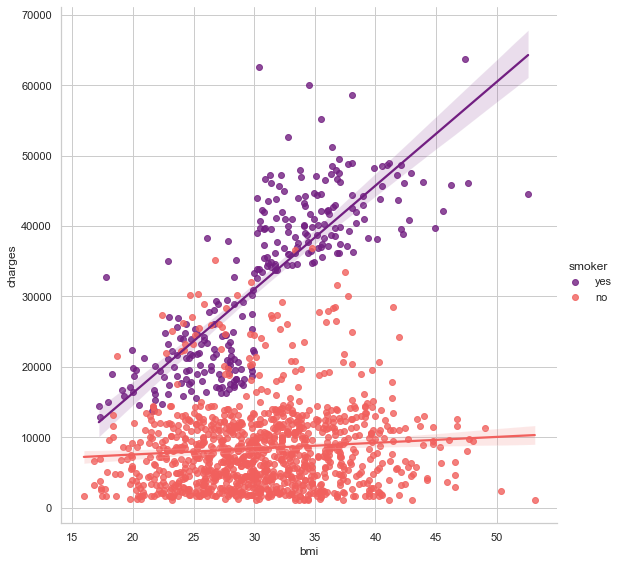

In [36]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

C:\Users\SR\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


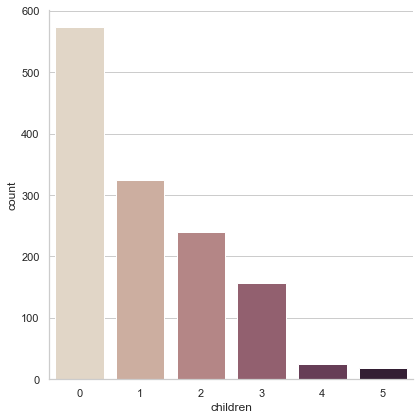

In [37]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

C:\Users\SR\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

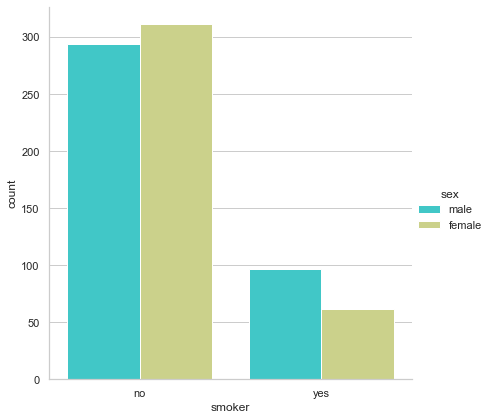

In [38]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')